In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Faridabad.csv')

In [3]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'QV2M', 'Latitude', 'Longitude', 'RH2M', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,11.81
1,2004010114,20.42
2,2004010406,5.69
3,2004010408,9.49
4,2004010410,15.46


In [5]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,11.81
1,2004-01-01 14:00:00,20.42
2,2004-01-04 06:00:00,5.69
3,2004-01-04 08:00:00,9.49
4,2004-01-04 10:00:00,15.46


In [6]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,11.81
2004-01-01 14:00:00,2004-01-01 14:00:00,20.42
2004-01-04 06:00:00,2004-01-04 06:00:00,5.69
2004-01-04 08:00:00,2004-01-04 08:00:00,9.49
2004-01-04 10:00:00,2004-01-04 10:00:00,15.46


In [7]:
data=data.sort_index()

In [8]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,5.32
2004-01-01 06:00:00,2004-01-01 06:00:00,4.92
2004-01-01 07:00:00,2004-01-01 07:00:00,6.62
2004-01-01 08:00:00,2004-01-01 08:00:00,9.30
2004-01-01 09:00:00,2004-01-01 09:00:00,11.81


In [9]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [10]:
#checking for duplicated entried
data.duplicated().sum()

120

In [11]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [12]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,15.12
2024-02-19 01:00:00,2024-02-19 01:00:00,14.48
2024-02-19 02:00:00,2024-02-19 02:00:00,13.40
2024-02-19 03:00:00,2024-02-19 03:00:00,12.51
2024-02-19 04:00:00,2024-02-19 04:00:00,11.86


In [13]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,17.70
2024-02-18 20:00:00,2024-02-18 20:00:00,17.38
2024-02-18 21:00:00,2024-02-18 21:00:00,16.79
2024-02-18 22:00:00,2024-02-18 22:00:00,16.16
2024-02-18 23:00:00,2024-02-18 23:00:00,15.62


In [14]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [15]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

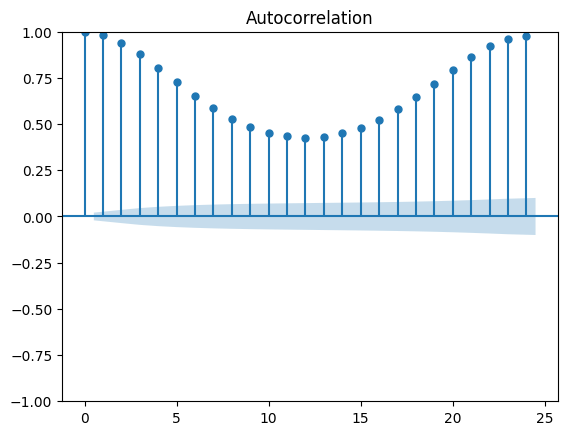

In [16]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

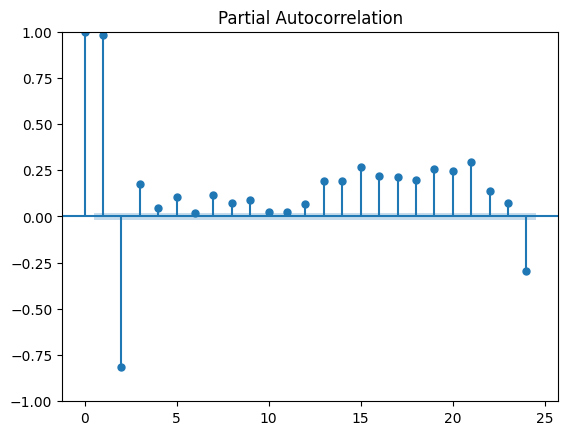

In [17]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [18]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [19]:
#to store RMSE after every year
rmse_record={}

In [20]:
# Fit SARIMA model
faridabad_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
faridabad_result = faridabad_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08641D-01    |proj g|=  4.04208D-01


 This problem is unconstrained.



At iterate    5    f=  5.53712D-01    |proj g|=  6.39481D-02

At iterate   10    f=  5.51705D-01    |proj g|=  1.41306D-03

At iterate   15    f=  5.51702D-01    |proj g|=  3.96958D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     28      1     0     0   5.701D-06   5.517D-01
  F =  0.55170221654256435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [21]:
# Forecast temperatures for the next 48 hours
forecast = faridabad_result.get_forecast(steps=48)

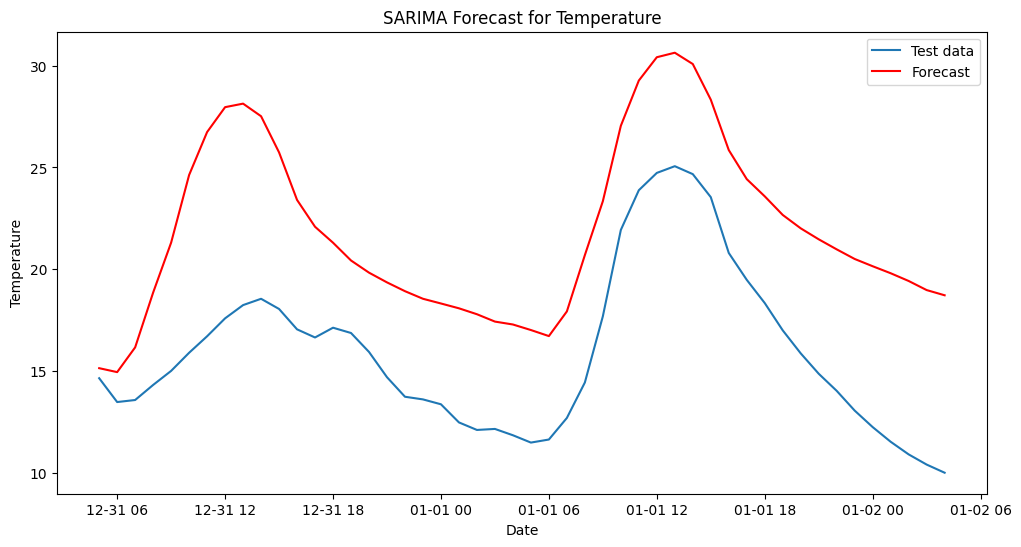

In [22]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 6.2863117624976805


In [24]:
rmse_record[1]=rmse

In [25]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


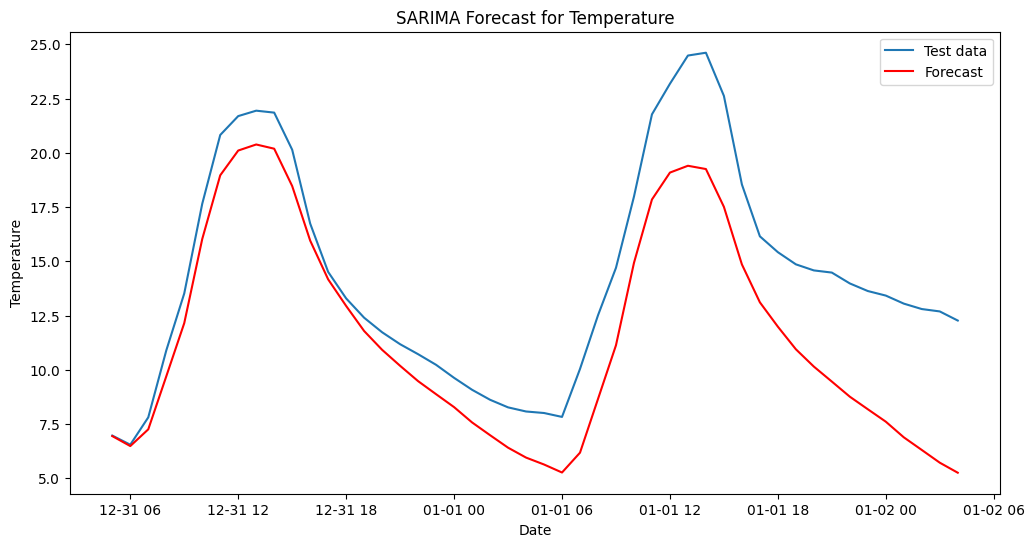

Root Mean Squared Error (RMSE): 3.4795511907606884
training now:  3


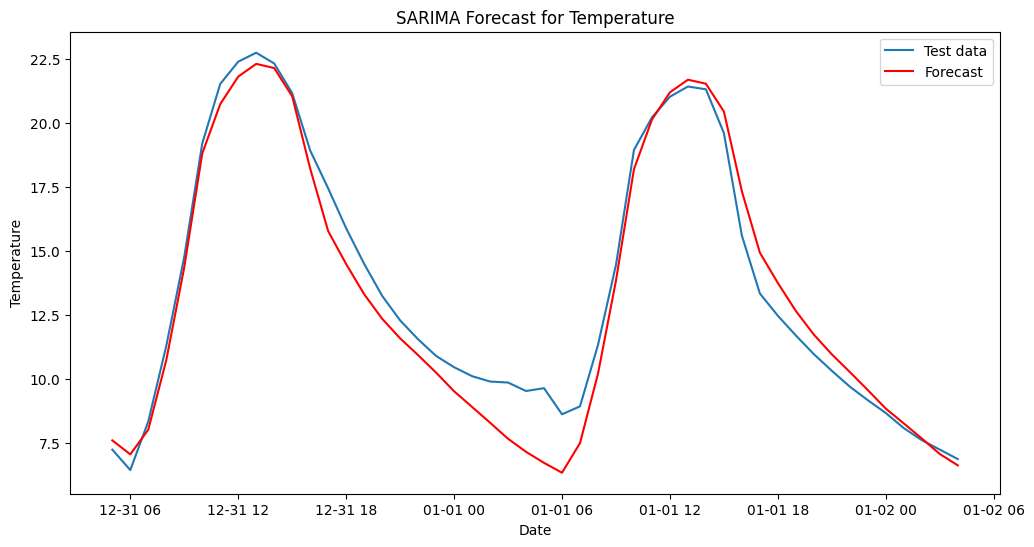

Root Mean Squared Error (RMSE): 1.0722516820137253
training now:  4


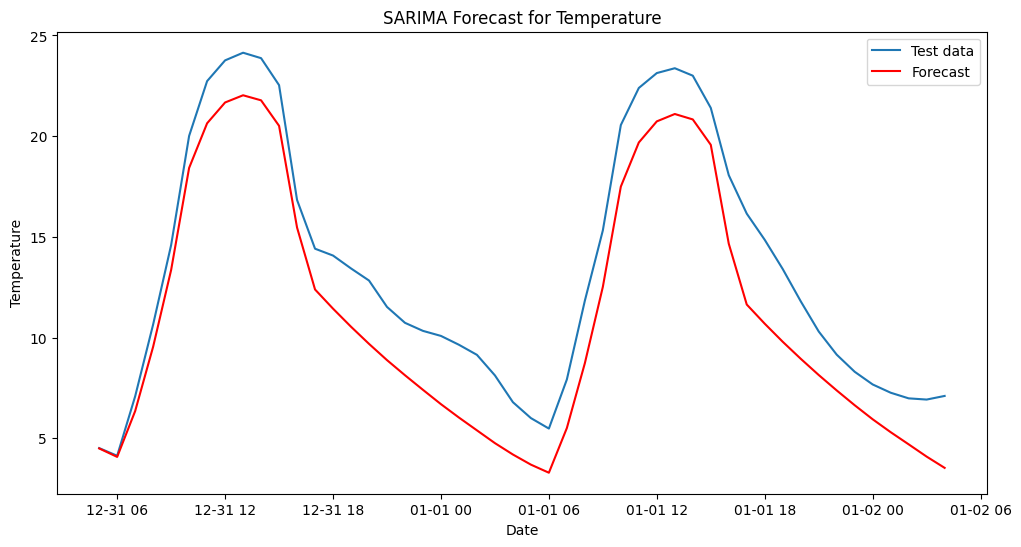

Root Mean Squared Error (RMSE): 2.5844517836788965
training now:  5


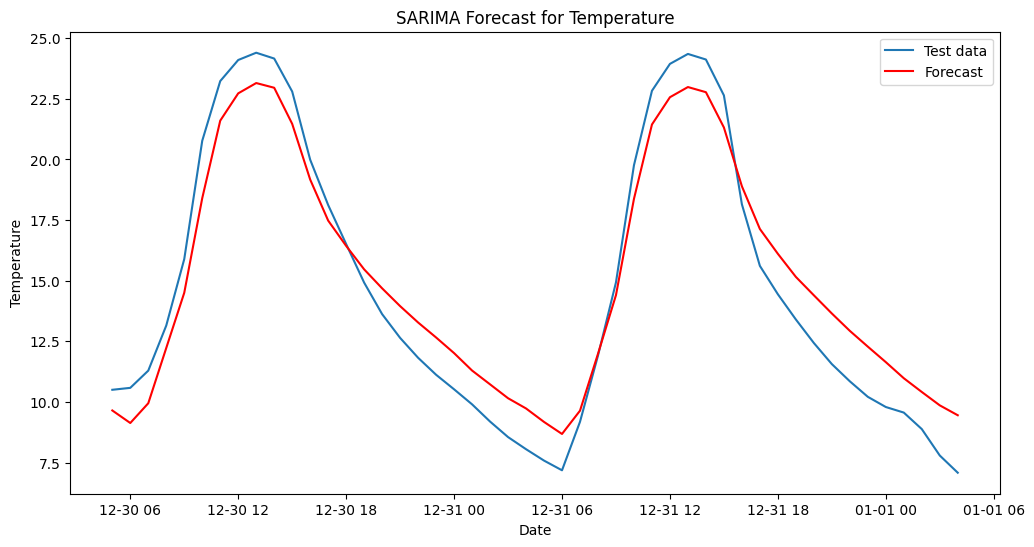

Root Mean Squared Error (RMSE): 1.4627709028951583
training now:  6


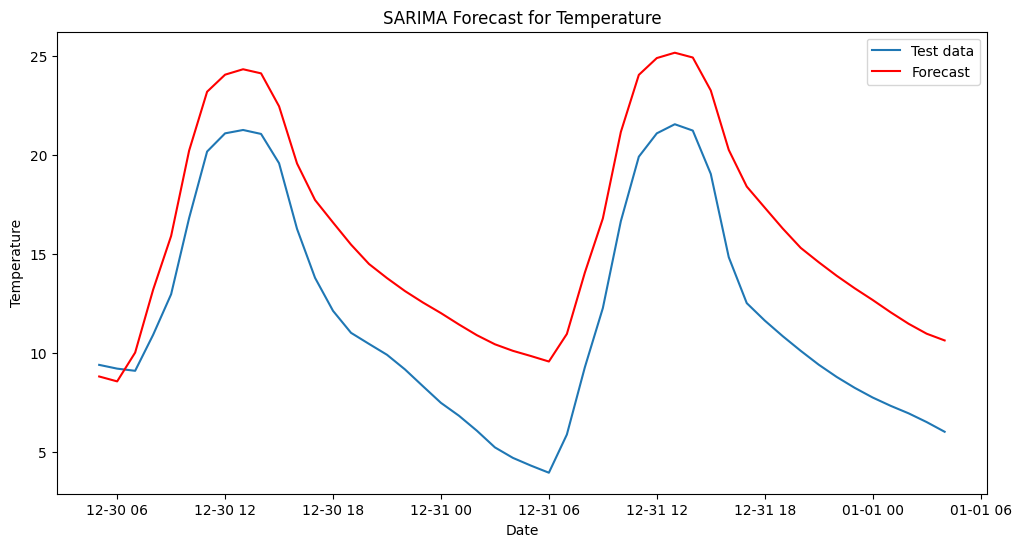

Root Mean Squared Error (RMSE): 4.3120146042255225
training now:  7


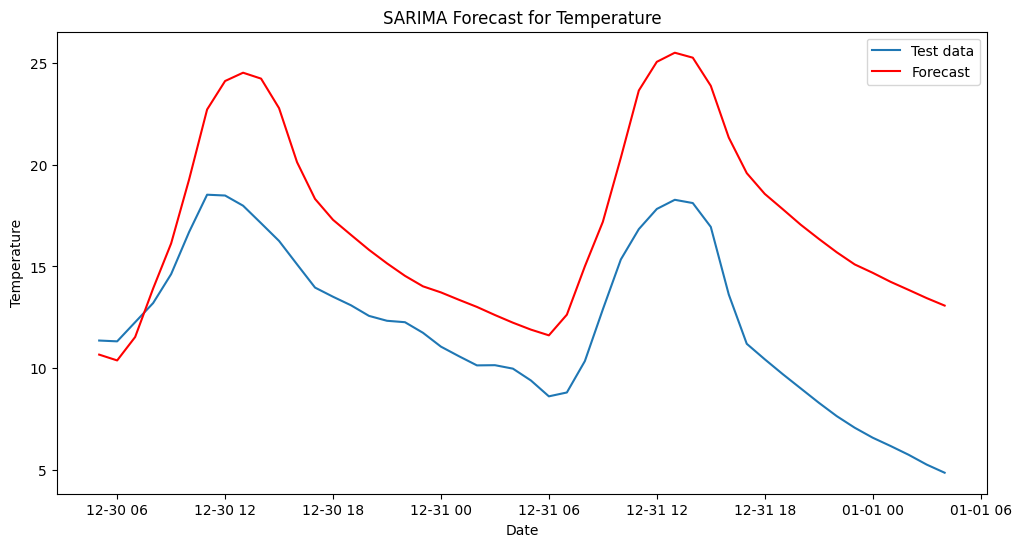

Root Mean Squared Error (RMSE): 5.633584469072323
training now:  8


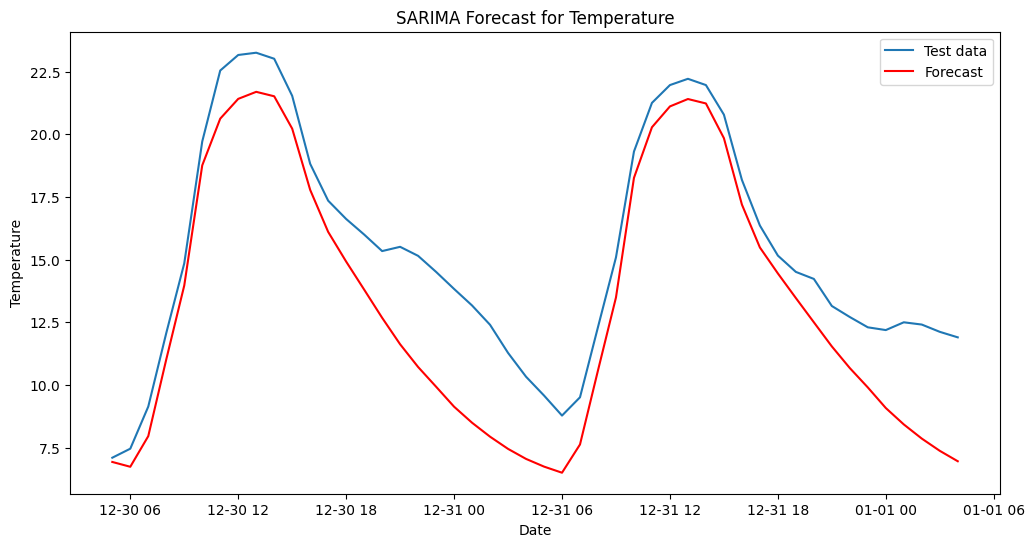

Root Mean Squared Error (RMSE): 2.5818908813988903
training now:  9


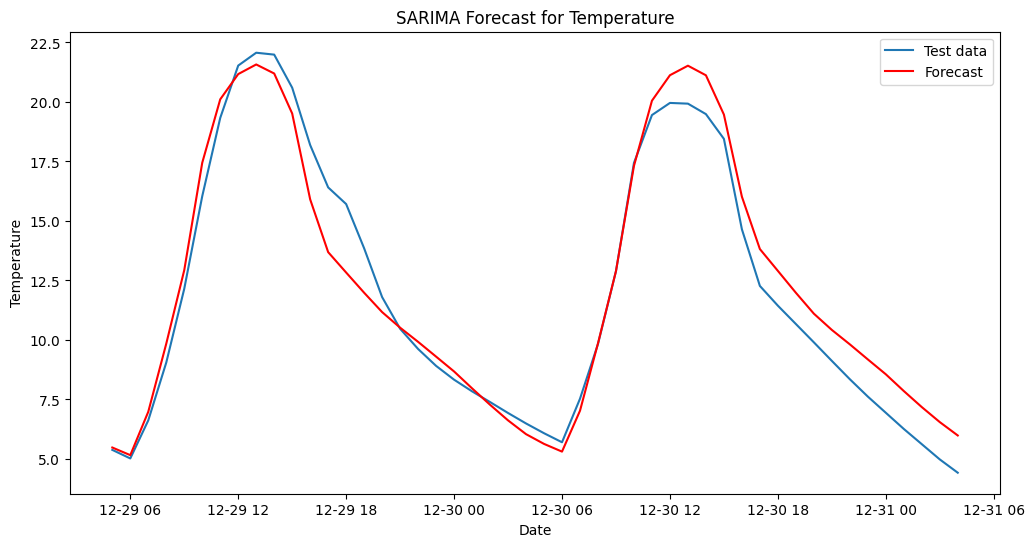

Root Mean Squared Error (RMSE): 1.1954233447851061
training now:  10


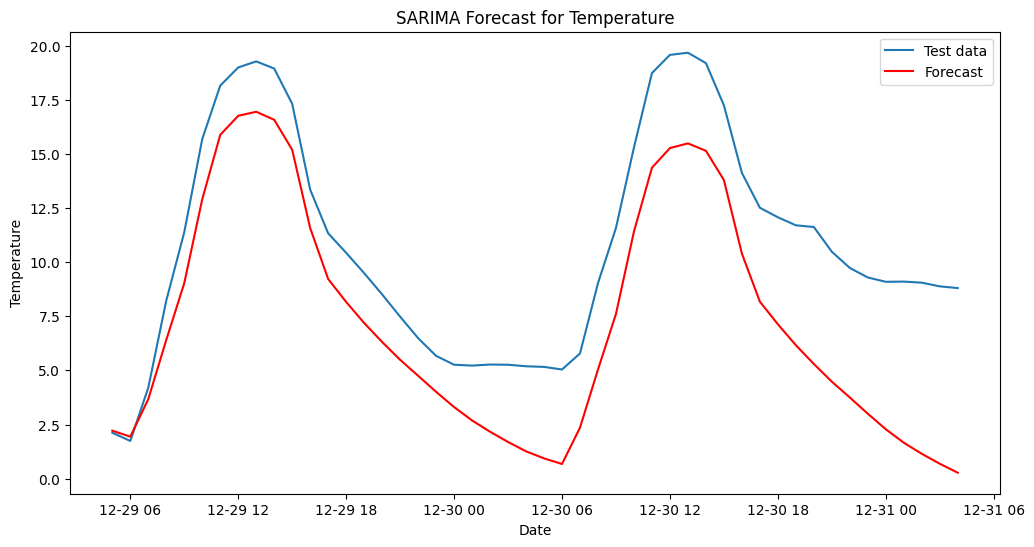

Root Mean Squared Error (RMSE): 4.196529229158677
training now:  11


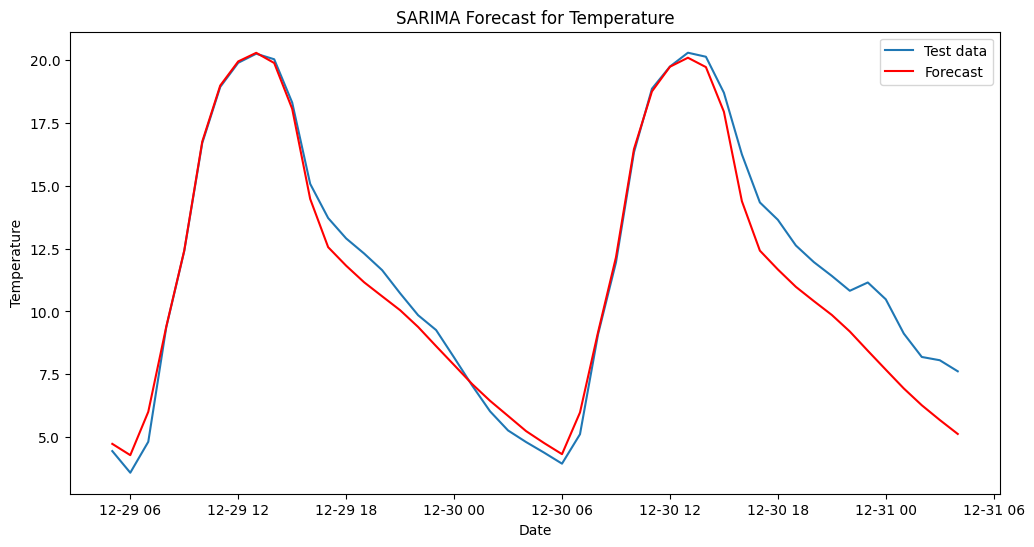

Root Mean Squared Error (RMSE): 1.1875826909081033
training now:  12


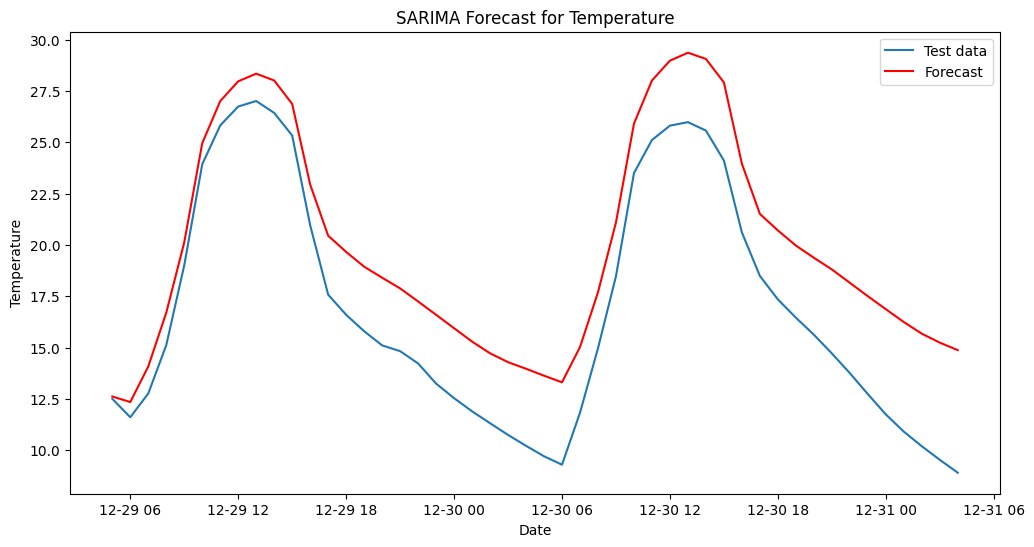

Root Mean Squared Error (RMSE): 3.347479562255985
training now:  13


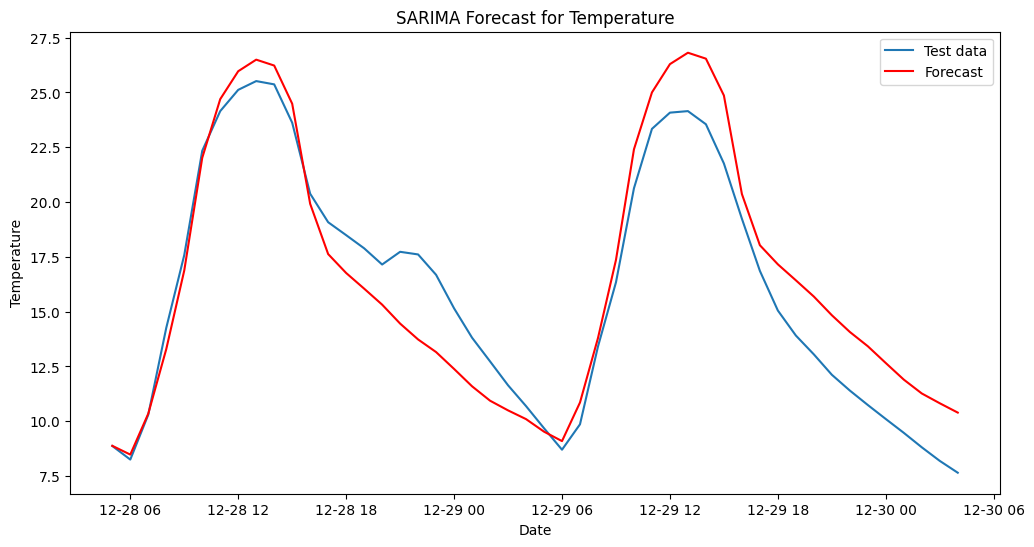

Root Mean Squared Error (RMSE): 1.9717980458031323
training now:  14


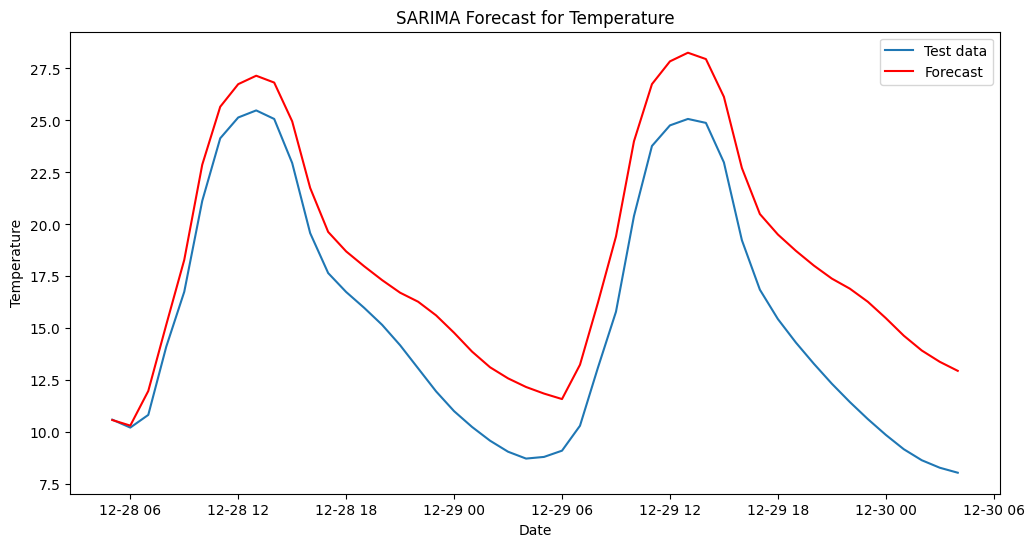

Root Mean Squared Error (RMSE): 3.4004388101568916
training now:  15


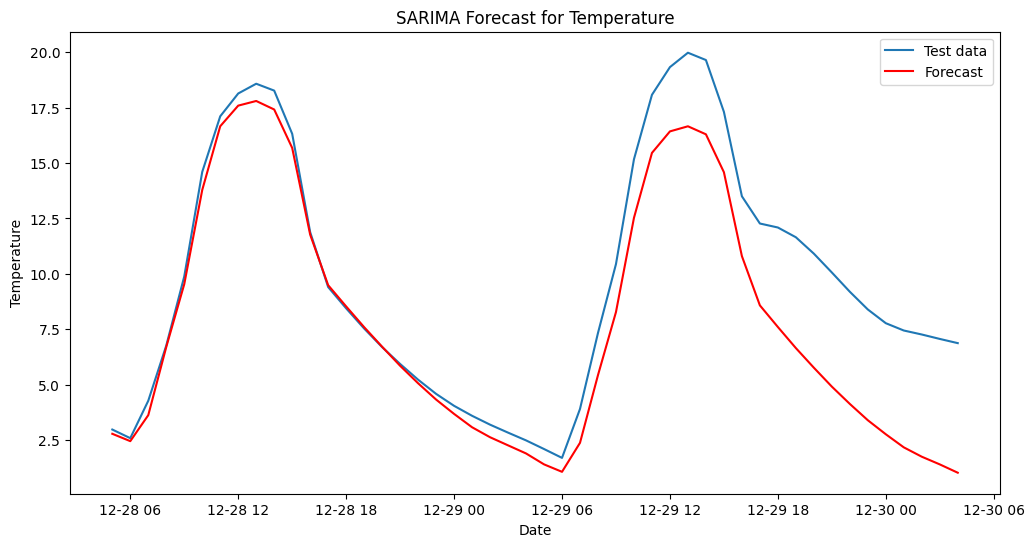

Root Mean Squared Error (RMSE): 2.843525241651114
training now:  16


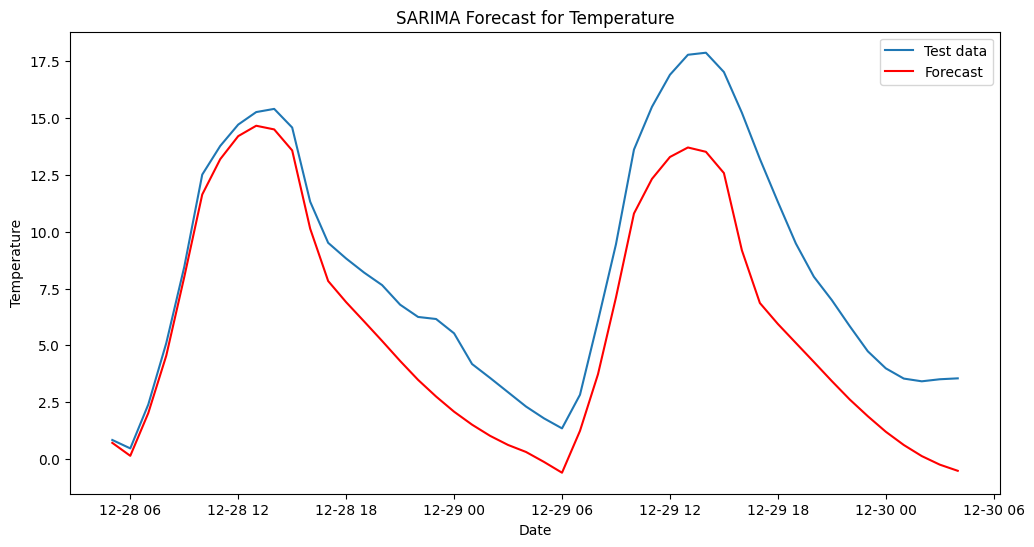

Root Mean Squared Error (RMSE): 2.9516577110605913
training now:  17


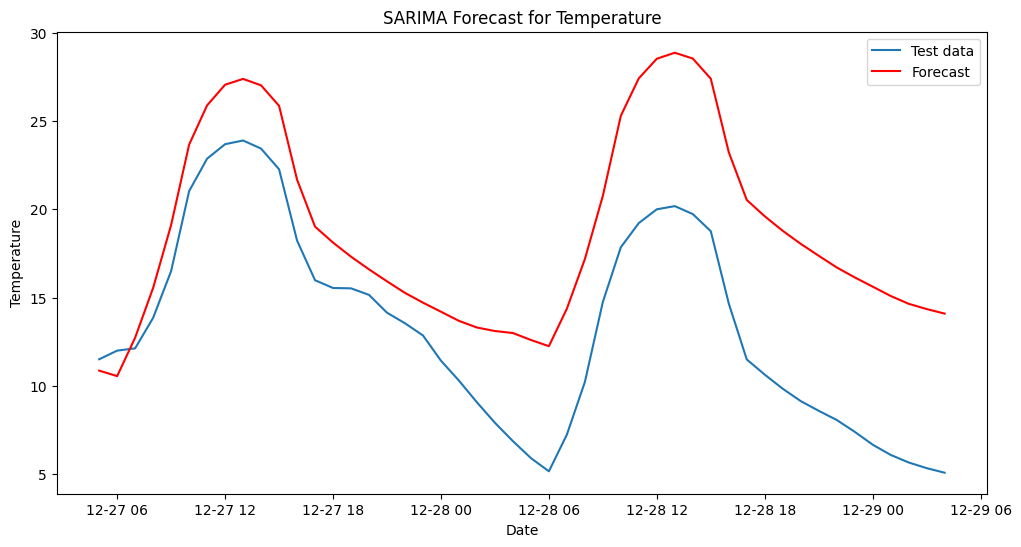

Root Mean Squared Error (RMSE): 6.300694873482581
training now:  18


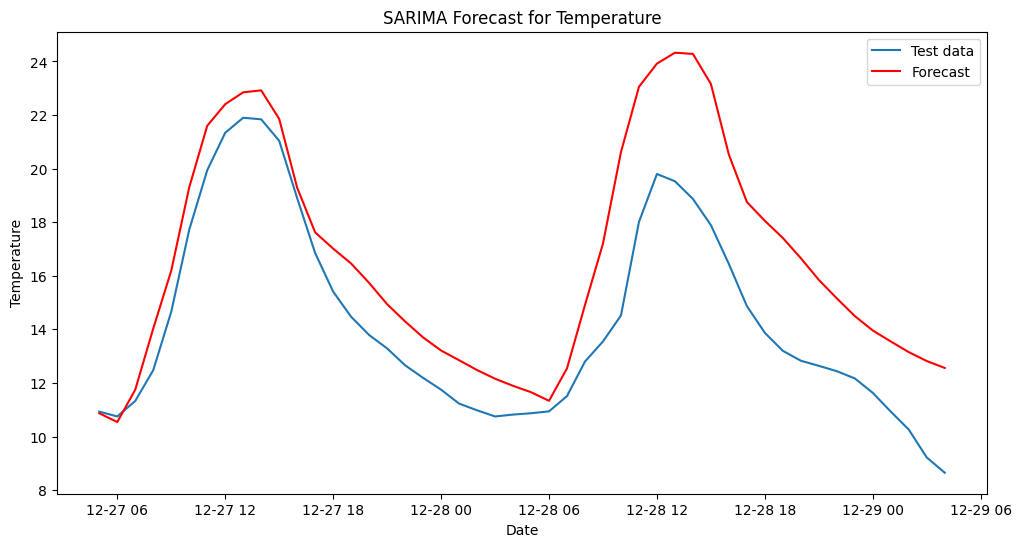

Root Mean Squared Error (RMSE): 2.798433384321117
training now:  19


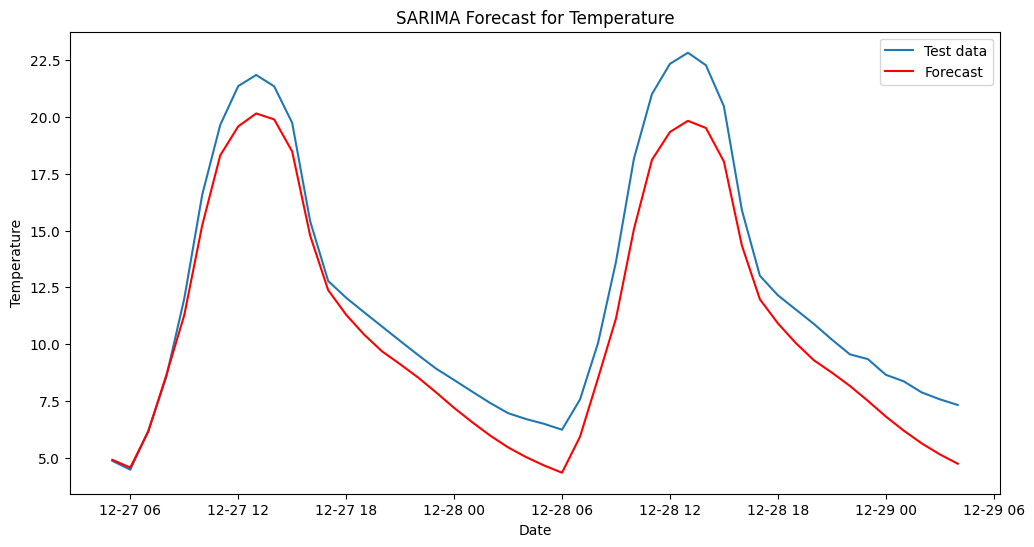

Root Mean Squared Error (RMSE): 1.716685270520165
training now:  20


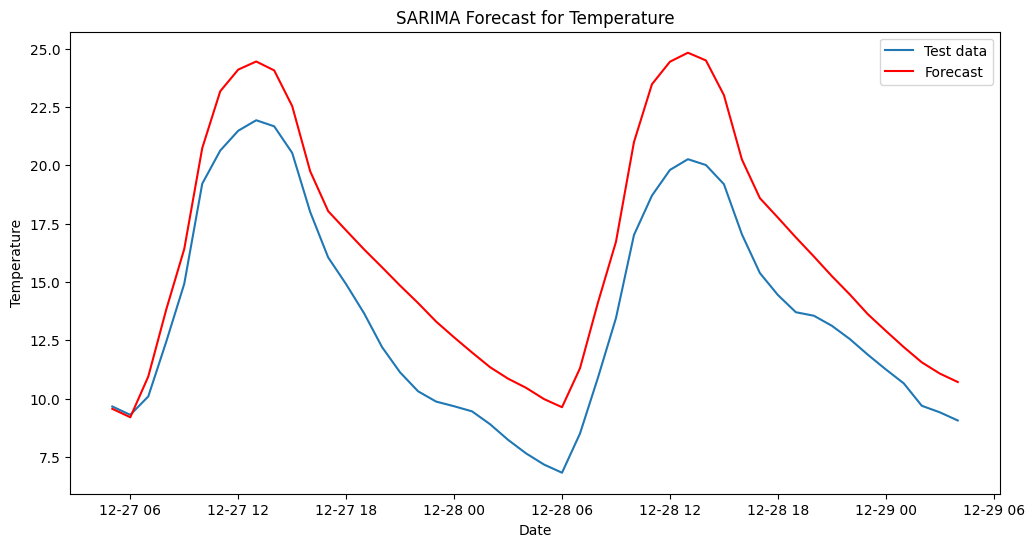

Root Mean Squared Error (RMSE): 2.8060848363369733


In [26]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    faridabad_result=faridabad_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = faridabad_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [27]:
rmse_record

{1: 6.2863117624976805,
 2: 3.4795511907606884,
 3: 1.0722516820137253,
 4: 2.5844517836788965,
 5: 1.4627709028951583,
 6: 4.3120146042255225,
 7: 5.633584469072323,
 8: 2.5818908813988903,
 9: 1.1954233447851061,
 10: 4.196529229158677,
 11: 1.1875826909081033,
 12: 3.347479562255985,
 13: 1.9717980458031323,
 14: 3.4004388101568916,
 15: 2.843525241651114,
 16: 2.9516577110605913,
 17: 6.300694873482581,
 18: 2.798433384321117,
 19: 1.716685270520165,
 20: 2.8060848363369733}

In [28]:
forecast2.predicted_mean

2023-12-27 05:00:00     9.560174
2023-12-27 06:00:00     9.197844
2023-12-27 07:00:00    10.943247
2023-12-27 08:00:00    13.818940
2023-12-27 09:00:00    16.412465
2023-12-27 10:00:00    20.735627
2023-12-27 11:00:00    23.172247
2023-12-27 12:00:00    24.100374
2023-12-27 13:00:00    24.448626
2023-12-27 14:00:00    24.067094
2023-12-27 15:00:00    22.536965
2023-12-27 16:00:00    19.745066
2023-12-27 17:00:00    18.034263
2023-12-27 18:00:00    17.206113
2023-12-27 19:00:00    16.391592
2023-12-27 20:00:00    15.623920
2023-12-27 21:00:00    14.840039
2023-12-27 22:00:00    14.093235
2023-12-27 23:00:00    13.300592
2023-12-28 00:00:00    12.623642
2023-12-28 01:00:00    11.973036
2023-12-28 02:00:00    11.344307
2023-12-28 03:00:00    10.852535
2023-12-28 04:00:00    10.460897
2023-12-28 05:00:00     9.977546
2023-12-28 06:00:00     9.628567
2023-12-28 07:00:00    11.298136
2023-12-28 08:00:00    14.119442
2023-12-28 09:00:00    16.721011
2023-12-28 10:00:00    20.993252
2023-12-28

In [29]:
train_data=data[175200:]

In [30]:
faridabad_result=faridabad_result.extend(train_data["TEMP"])
forecast2 = faridabad_result.get_forecast(steps=48)


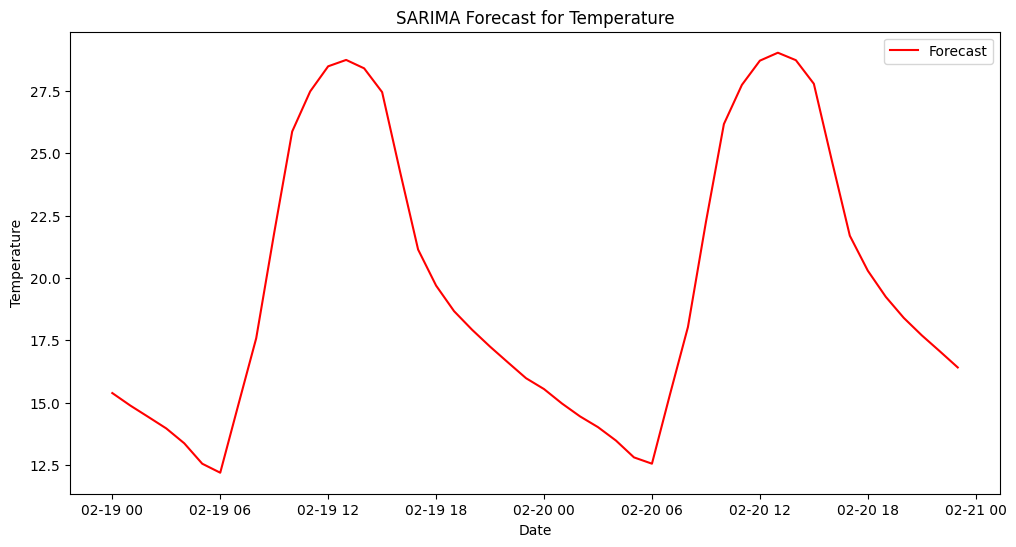

In [31]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [32]:
#saving pickle file of model
with open("/kaggle/working/faridabad_model.pkl", 'wb') as f:
    pickle.dump(faridabad_result, f)

In [33]:
forecast2.predicted_mean

2024-02-19 00:00:00    15.379249
2024-02-19 01:00:00    14.878413
2024-02-19 02:00:00    14.421599
2024-02-19 03:00:00    13.959416
2024-02-19 04:00:00    13.362967
2024-02-19 05:00:00    12.542998
2024-02-19 06:00:00    12.181557
2024-02-19 07:00:00    14.890908
2024-02-19 08:00:00    17.579336
2024-02-19 09:00:00    21.808186
2024-02-19 10:00:00    25.876476
2024-02-19 11:00:00    27.486120
2024-02-19 12:00:00    28.494461
2024-02-19 13:00:00    28.750455
2024-02-19 14:00:00    28.412935
2024-02-19 15:00:00    27.457749
2024-02-19 16:00:00    24.255647
2024-02-19 17:00:00    21.139795
2024-02-19 18:00:00    19.692814
2024-02-19 19:00:00    18.665520
2024-02-19 20:00:00    17.920648
2024-02-19 21:00:00    17.242101
2024-02-19 22:00:00    16.604935
2024-02-19 23:00:00    15.975521
2024-02-20 00:00:00    15.538980
2024-02-20 01:00:00    14.958546
2024-02-20 02:00:00    14.443279
2024-02-20 03:00:00    14.011027
2024-02-20 04:00:00    13.471790
2024-02-20 05:00:00    12.797535
2024-02-20